# **DATA ANALYSIS ON WINE QUALITY DATASET**



In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WineQT.csv']))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Loading the Dataset")
df.head()
df.shape

Loading the Dataset


(1143, 13)

In [ ]:
print("Checking for NULL values")
df.isnull()
df.isnull().sum()

Checking for NULL values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**AVERAGE ALCOHOL CONTENT IN DIFFERENT QUALITY CATEGORIES**

Average Alcohol Content by Quality:
 quality
3     9.691667
4    10.260606
5     9.902277
6    10.655339
7    11.482634
8    11.937500
Name: alcohol, dtype: float64


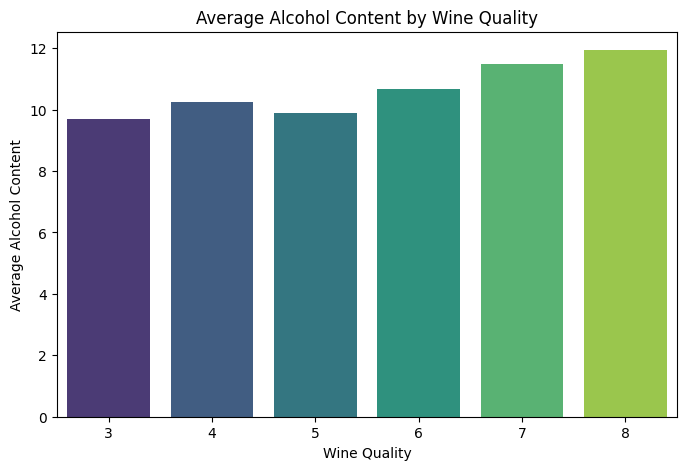

In [ ]:
average_alcohol_by_quality = df.groupby('quality')['alcohol'].mean()
print("Average Alcohol Content by Quality:\n", average_alcohol_by_quality)
plt.figure(figsize=(8, 5))
sns.barplot(x=average_alcohol_by_quality.index, y=average_alcohol_by_quality.values, palette='viridis')
plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol Content')
plt.show()

**HEATMAP DEPICTING THE CORRELATION BETWEEN DIFFERENT CHEMICAL PROPERTIES AND WINE QUALITY**

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Id                      0.069708
Name: quality, dtype: float64


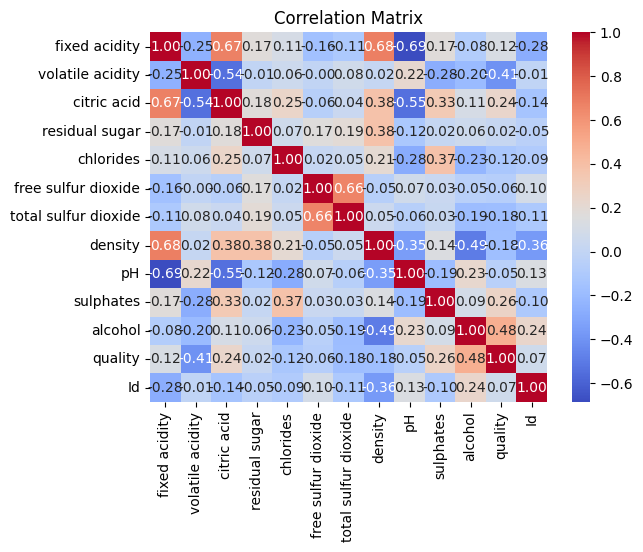

In [ ]:
print(df.corr()['quality'])
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**SCATTER PLOT TO VISUALIZE THE RELATIONSHIP BETWEEN ALCOHOL CONTENT AND WINE QUALITY**

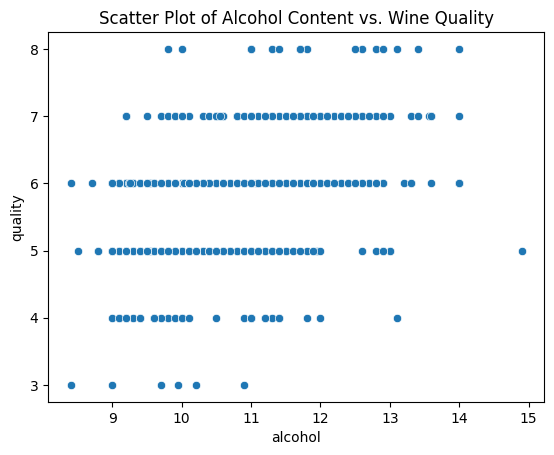

In [ ]:
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Scatter Plot of Alcohol Content vs. Wine Quality')
plt.show()

**COMPARING THE AVERAGE CONTENT OF MULTIPLE CHEMICAL COMPONENTS ACROSS DIFFERENT WINE QUALITIES**

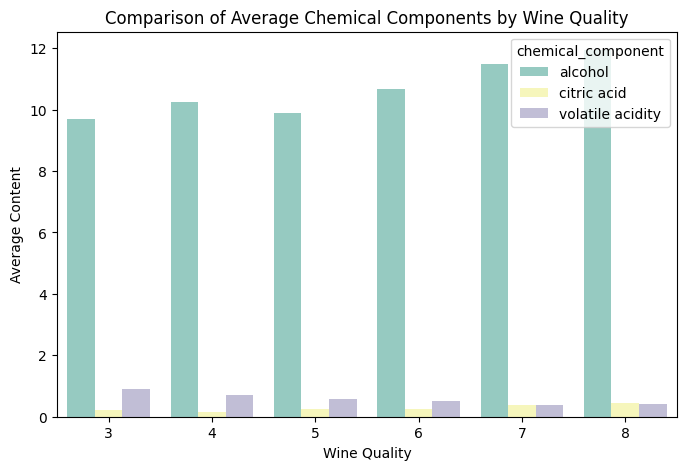

In [ ]:
selected_columns = ['quality', 'alcohol', 'citric acid', 'volatile acidity']
selected_data = df[selected_columns]
average_content_by_quality = selected_data.groupby('quality').mean().reset_index()
melted_data = pd.melt(average_content_by_quality, id_vars='quality', var_name='chemical_component', value_name='average_content')
plt.figure(figsize=(8, 5))
sns.barplot(x='quality', y='average_content', hue='chemical_component', data=melted_data, palette='Set3')
plt.title('Comparison of Average Chemical Components by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Content')
plt.show()

**TREND OF PH OVER WINE QUALITY**

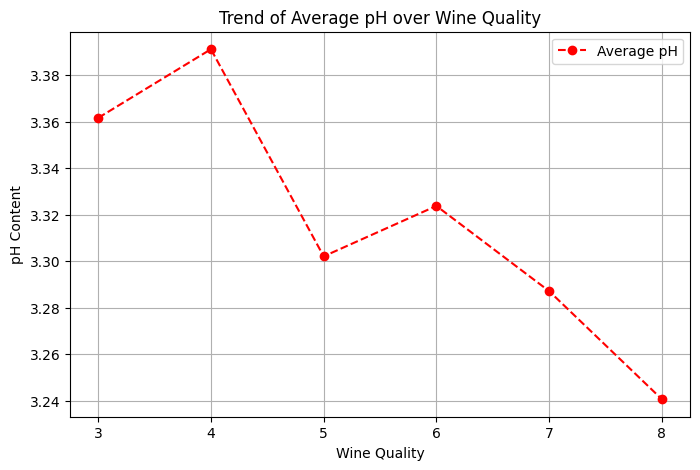

In [ ]:
average_ph_by_quality = df.groupby('quality')['pH'].mean()

plt.figure(figsize=(8, 5))
plt.plot(average_ph_by_quality.index, average_ph_by_quality.values, marker='o', linestyle='--', color='r', label='Average pH')
plt.title('Trend of Average pH over Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('pH Content')
plt.grid(True)
plt.legend()
plt.show()

**ANALYSIS OF FIXED ACIDITY AND VOLATILE ACIDITY**

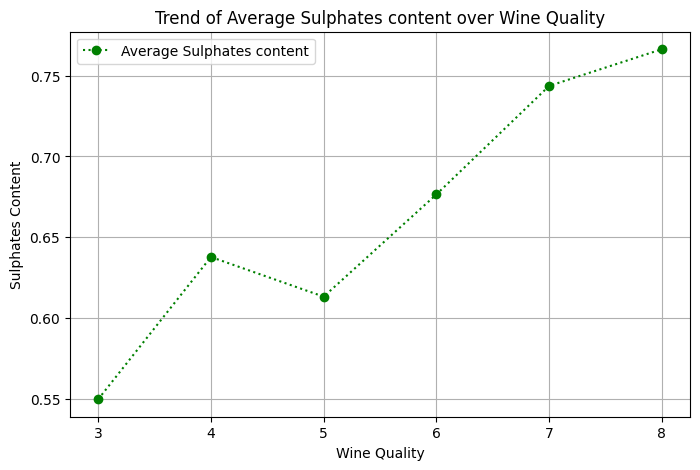

In [ ]:
average_sulphates_by_quality = df.groupby('quality')['sulphates'].mean()
plt.figure(figsize=(8, 5))
plt.plot(average_sulphates_by_quality.index, average_sulphates_by_quality.values, marker='o', linestyle=':', color='g', label='Average Sulphates content')
plt.title('Trend of Average Sulphates content over Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates Content')
plt.grid(True)
plt.legend()
plt.show()

**EFFECT OF CITRIC ACID ON WINE QUALITY**

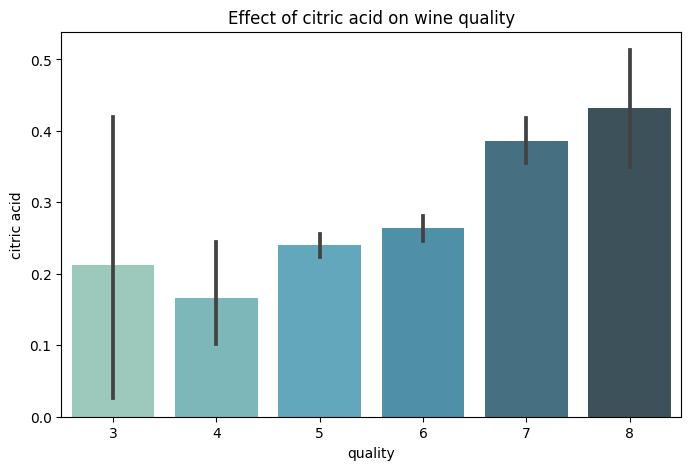

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['quality'], y=df['citric acid'],palette="GnBu_d")
plt.title("Effect of citric acid on wine quality")
plt.show()

**SCATTERPLOT DEPICTING THE EFFECT OF ALCOHOL CONTENT ON PH**

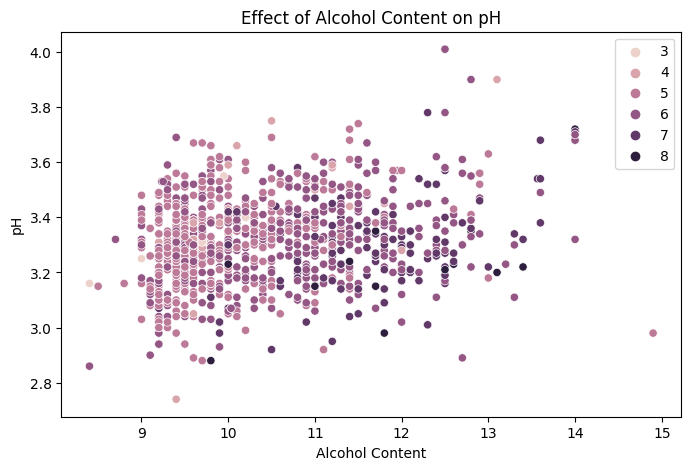

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='alcohol', y='pH', data=df, hue='quality')
plt.title('Effect of Alcohol Content on pH')
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.legend()
plt.show()